## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [16]:
import pandas as pd

# Read the file 'cleaned_ecommerce_dataset.csv' 
df = pd.read_csv("cleaned_ecommerce_dataset.csv")

# Print the total length of the dataset
print(f"Total length of the dataset: {len(df)}")


Total length of the dataset: 2685


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.

  Hints: To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [18]:
# display the first few rows
print("First few rows of the dataset:")
print(df.head())

# get an overview of the data 
print("Data types")
print(df.info())

First few rows of the dataset:
   userId  timestamp                                           review  \
0    4081      71900                                Not always McCrap   
1    4081      72000  I dropped the chalupa even before he told me to   
2    4081      72000                     The Wonderful World of Wendy   
3    4081     100399                             They actually did it   
4    4081     100399                             Hey! Gimme some pie!   

                                 item  rating  helpfulness gender  \
0                          McDonald's     4.0          3.0      M   
1                           Taco Bell     1.0          4.0      M   
2                             Wendy's     5.0          4.0      M   
3  South Park: Bigger, Longer & Uncut     5.0          3.0      M   
4                        American Pie     3.0          3.0      M   

                category  item_id  item_price  user_city  
0  Restaurants & Gourmet       41       30.74          4

In [19]:
from sklearn.preprocessing import OrdinalEncoder

# initialize the encoder
encoder = OrdinalEncoder()

# encode categorical features: gender, category, and review
df[['gender', 'category', 'review']] = encoder.fit_transform(df[['gender', 'category', 'review']])

# Calculate correlations
correlations = df[['helpfulness', 'gender', 'category', 'review', 'rating']].corr()

print(correlations)

             helpfulness    gender  category    review    rating
helpfulness     1.000000  0.075947 -0.013408 -0.028259 -0.007523
gender          0.075947  1.000000  0.022549 -0.037884 -0.034337
category       -0.013408  0.022549  1.000000  0.001970 -0.163158
review         -0.028259 -0.037884  0.001970  1.000000 -0.036118
rating         -0.007523 -0.034337 -0.163158 -0.036118  1.000000


### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [22]:
from sklearn.model_selection import train_test_split

# case 1 10% of the data for training
train_case1, test_case1 = train_test_split(df, train_size=0.1, random_state=66)

print("case 1:")
print("training set shape:", train_case1.shape)
print("testing set shape:", test_case1.shape)

# case 2 90% of the data for training
train_case2, test_case2 = train_test_split(df, train_size=0.9, random_state=66)

print("\ncase 2:")
print("training set shape:", train_case2.shape)
print("testing set shape:", test_case2.shape)


case 1:
training set shape: (268, 11)
testing set shape: (2417, 11)

case 2:
training set shape: (2416, 11)
testing set shape: (269, 11)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features from helpfulness/gender/category/review regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [23]:
from sklearn.linear_model import LinearRegression

# Selecting two most correlated features and two least correlated features with rating
most_correlated_features = ['helpfulness', 'review']
least_correlated_features = ['gender', 'category']

# model a: Using the training/testing data in case 1 with two most correlated input features
X_train_a, X_test_a = train_case1[most_correlated_features], test_case1[most_correlated_features]
y_train_a, y_test_a = train_case1['rating'], test_case1['rating']

model_a = LinearRegression()
model_a.fit(X_train_a, y_train_a)

# model b: Using the training/testing data in case 1 with two least correlated input features
X_train_b, X_test_b = train_case1[least_correlated_features], test_case1[least_correlated_features]
y_train_b, y_test_b = train_case1['rating'], test_case1['rating']

model_b = LinearRegression()
model_b.fit(X_train_b, y_train_b)

# model c: Using the training/testing data in case 2 with two most correlated input features
X_train_c, X_test_c = train_case2[most_correlated_features], test_case2[most_correlated_features]
y_train_c, y_test_c = train_case2['rating'], test_case2['rating']

model_c = LinearRegression()
model_c.fit(X_train_c, y_train_c)

# model d: Using the training/testing data in case 2 with two least correlated input features
X_train_d, X_test_d = train_case2[least_correlated_features], test_case2[least_correlated_features]
y_train_d, y_test_d = train_case2['rating'], test_case2['rating']

model_d = LinearRegression()
model_d.fit(X_train_d, y_train_d)

# model a
print("model a Coefficients:", model_a.coef_)
print("model a Intercept:", model_a.intercept_)

# model b
print("model b Coefficients:", model_b.coef_)
print("model b Intercept:", model_b.intercept_)

# model c
print("\nModel-c Coefficients:", model_c.coef_)
print("Model-c Intercept:", model_c.intercept_)

# model d
print("\nModel-d Coefficients:", model_d.coef_)
print("Model-d Intercept:", model_d.intercept_)


model a Coefficients: [ 0.14312605 -0.00015009]
model a Intercept: 3.351195533381069
model b Coefficients: [ 0.12856096 -0.11890386]
model b Intercept: 4.246065315029025

Model-c Coefficients: [-5.93584384e-02 -5.57487495e-05]
Model-c Intercept: 4.013681722271123

Model-d Coefficients: [-0.05764882 -0.12745212]
Model-d Intercept: 4.378166780887855


### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions for model a
predictions_a = model_a.predict(X_test_a)
mse_a = mean_squared_error(y_test_a, predictions_a)
rmse_a = np.sqrt(mse_a)
r2_a = r2_score(y_test_a, predictions_a)

# Predictions for model b
predictions_b = model_b.predict(X_test_b)
mse_b = mean_squared_error(y_test_b, predictions_b)
rmse_b = np.sqrt(mse_b)
r2_b = r2_score(y_test_b, predictions_b)

# Predictions for model c
predictions_c = model_c.predict(X_test_c)
mse_c = mean_squared_error(y_test_c, predictions_c)
rmse_c = np.sqrt(mse_c)
r2_c = r2_score(y_test_c, predictions_c)

# Predictions for model d
predictions_d = model_d.predict(X_test_d)
mse_d = mean_squared_error(y_test_d, predictions_d)
rmse_d = np.sqrt(mse_d)
r2_d = r2_score(y_test_d, predictions_d)

# Print the results
print("Model-a - MSE:", mse_a, "RMSE:", rmse_a, "R-squared:", r2_a)
print("Model-b - MSE:", mse_b, "RMSE:", rmse_b, "R-squared:", r2_b)
print("Model-c - MSE:", mse_c, "RMSE:", rmse_c, "R-squared:", r2_c)
print("Model-d - MSE:", mse_d, "RMSE:", rmse_d, "R-squared:", r2_d)



Model-a - MSE: 1.8199366549304943 RMSE: 1.3490502788741767 R-squared: -0.004041897278896478
Model-b - MSE: 1.7750345909125875 RMSE: 1.332304241122345 R-squared: 0.020730148180015062
Model-c - MSE: 1.8975333253582367 RMSE: 1.3775098276811808 R-squared: 0.002604790171521154
Model-d - MSE: 1.8583170118923098 RMSE: 1.363201016685474 R-squared: 0.02321795288931583


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

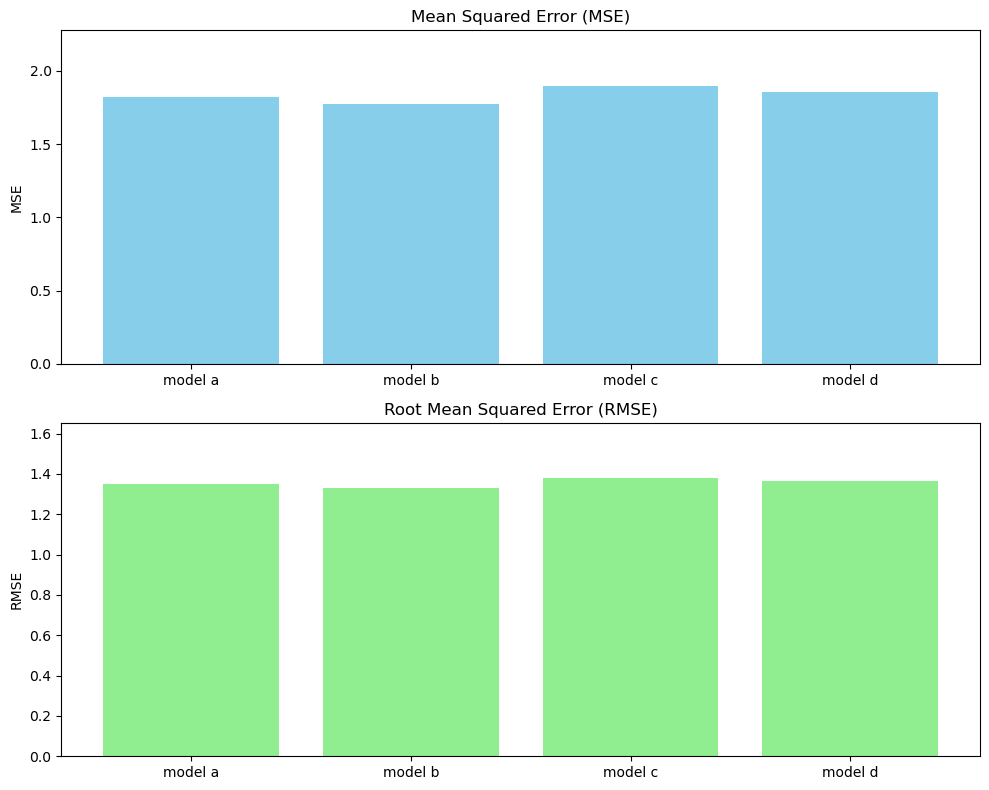

In [30]:
import matplotlib.pyplot as plt

# Data for visualization
models = ['model a', 'model b', 'model c', 'model d']
mse_values = [mse_a, mse_b, mse_c, mse_d]
rmse_values = [rmse_a, rmse_b, rmse_c, rmse_d]

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot MSE
ax1.bar(models, mse_values, color='skyblue')
ax1.set_title('Mean Squared Error (MSE)')
ax1.set_ylabel('MSE')

# Set y-axis scale for MSE
ax1.set_ylim(0, max(mse_values) * 1.2)

# Plot RMSE
ax2.bar(models, rmse_values, color='lightgreen')
ax2.set_title('Root Mean Squared Error (RMSE)')
ax2.set_ylabel('RMSE')

# Set y-axis scale for RMSE
ax2.set_ylim(0, max(rmse_values) * 1.2)

# Show plot
plt.tight_layout()
plt.show()



We can see from the graphs that there is clear data similarity, this shows that the sets they were trained on were similar and the data is comparable, 

it is clear from the results that the models have a lot of room for improvement, RMSE values are close which tells us there is a similar performance and can be a sign that the test and data are consistent across all 4 tests, based on the extra R squared test I have performed we can also state that none of the models has low predictive powers as none of the R squared values are close to 1 

### Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.



Table 1 Ethical Concerns

As Germany and France both have 41 total medals the principle of fairness and objectivity as well as clarity and simplicity would dictate that the reasoning for putting Germany above France needs to be explained. this choice was most likely made as Germany has a higher number of gold medals but without explanation from someone on the table, this is only an assumption. 

Table 2 Ethical Concerns

Table 2 follows the principles of ethical data visualisation, The ranking is accurate and fits within honesty and accuracy, by highlighting the gold medal tally it makes the chart easily readable, clear and simple. the graph is fair and doesn't attempt to shift any data to promote a bias. by going via country in a public and internationally recognised competition they aren't using sensitive or private data to violate the privacy of those involved and finally the Olympics is an international comp and honours cultural sensitivity 

General Discussion 

Both of the tables do a good job of abiding by data visualisation ethics and display the data honestly and clearly. 